In [1]:
import os
import seaborn as sns
from matplotlib import pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import (
    Conv2D,
    Dense,
    Dropout,
    Flatten,
    Input,
    MaxPooling2D,
)
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
from PIL import ImageFile

ImageFile.LOAD_TRUNCATED_IMAGES = True

In [3]:
def total_files(folder_path):
    num_files = len(
        [
            f
            for f in os.listdir(folder_path)
            if os.path.isfile(os.path.join(folder_path, f))
        ]
    )
    return num_files

In [4]:
# === Dataset Summary ===
splits = ["train", "validation", "test"]
base_path = "Dataset"

for split in splits:
    print(f"\n{'=' * 25} {split.upper()} SET {'=' * 25}\n")
    split_path = os.path.join(base_path, split)

    for class_name in os.listdir(split_path):
        class_path = os.path.join(split_path, class_name)
        if os.path.isdir(class_path):
            num_images = total_files(class_path)
            print(f"Number of images in class '{class_name}' - {num_images}")


========================= TRAIN SET =========================

Number of images in class 'Damaged_Infrastructure_Earthquake' - 21
Number of images in class 'Damaged_Infrastructure_Infrastructure' - 850
Number of images in class 'Fire_Disaster_Urban_Fire' - 251
Number of images in class 'Fire_Disaster_Wild_Fire' - 308
Number of images in class 'Human_Damage' - 143
Number of images in class 'Land_Disaster_Drought' - 120
Number of images in class 'Land_Disaster_Land_Slide' - 273
Number of images in class 'Non_Damage_human' - 72
Number of images in class 'Non_Damage_Non_Damage_Buildings_Street' - 2743
Number of images in class 'Non_Damage_Non_Damage_Wildlife_Forest' - 1362
Number of images in class 'Non_Damage_sea' - 1364
Number of images in class 'Water_Disaster' - 621

========================= VALIDATION SET =========================

Number of images in class 'Damaged_Infrastructure_Earthquake' - 7
Number of images in class 'Damaged_Infrastructure_Infrastructure' - 284
Number of image

In [5]:
# === Data Augmentation ===
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1,
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    "Dataset/train",
    target_size=(225, 225),
    batch_size=32,
    class_mode="categorical",
)

validation_generator = test_datagen.flow_from_directory(
    "Dataset/validation",
    target_size=(225, 225),
    batch_size=32,
    class_mode="categorical",
)

Found 8128 images belonging to 12 classes.
Found 2711 images belonging to 12 classes.


In [6]:
# === CNN Model ===
model = Sequential()

model.add(Input(shape=(225, 225, 3)))

# CNN Block 1
model.add(Conv2D(16, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

# CNN Block 2
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

# CNN Block 3
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

# CNN Block 4
model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

# CNN Flatten and Dense layers
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(12, activation="softmax"))

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 223, 223, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     4,718,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 12)             │         3,084 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,819,372 (18.38 MB)

 Trainable params: 4,819,372 (18.38 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# === Compile ===
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [9]:
# === Early stopping ===
early_stop = EarlyStopping(monitor="val_loss", patience=6, restore_best_weights=True)

In [10]:
# === Train ===
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    callbacks=[early_stop],
)

c:\Users\Koustav Chatterjee\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 234s 912ms/step - accuracy: 0.4600 - loss: 1.6636 - val_accuracy: 0.5762 - val_loss: 1.2148
Epoch 2/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 145s 570ms/step - accuracy: 0.6296 - loss: 1.1543 - val_accuracy: 0.7016 - val_loss: 1.0026
Epoch 3/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 152s 597ms/step - accuracy: 0.6748 - loss: 0.9953 - val_accuracy: 0.7329 - val_loss: 0.8707
Epoch 4/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 159s 626ms/step - accuracy: 0.7166 - loss: 0.8851 - val_accuracy: 0.7540 - val_loss: 0.7772
Epoch 5/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 159s 624ms/step - accuracy: 0.7414 - loss: 0.7841 - val_accuracy: 0.7429 - val_loss: 0.8400
Epoch 6/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 152s 597ms/step - accuracy: 0.7629 - loss: 0.7387 - val_accuracy: 0.7318 - val_loss: 0.9098
Epoch 7/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 152s 596ms/step - accuracy: 0.7812 - loss: 0.6781 - val_accuracy: 0.7827 - val_loss: 0.7341
Epoch 8/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 191s 754ms/step - accuracy: 0.7759 -

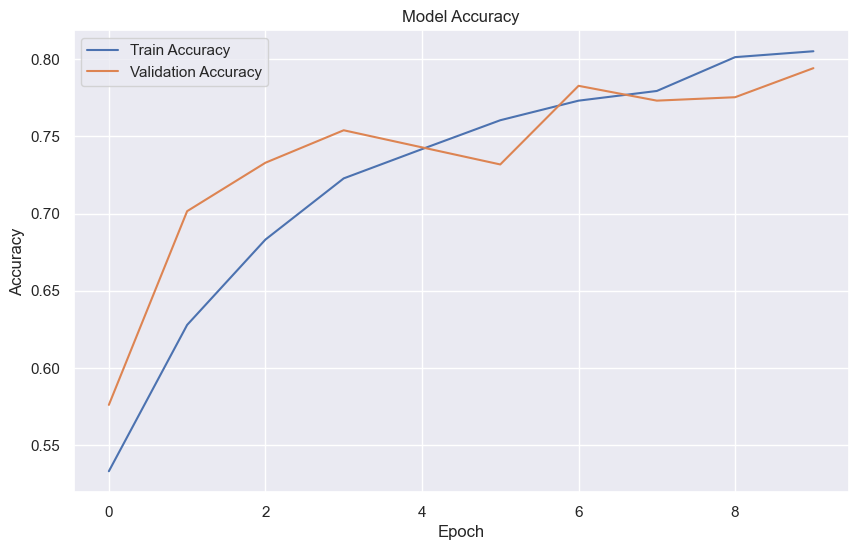

In [11]:
# === Accuracy Plot ===
sns.set_theme()
plt.figure(figsize=(10, 6))
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [12]:
# === Save Model ===
model.save("model.h5")